### Wprowadzenie do biblioteki NLTK

#### Wprowadzenie
Przetwarzanie języka naturalnego czyli NLP (Natural Language Processing) to dziedzina sztucznej inteligencji umożliwiająca maszynom zrozumienie ludzkiego języka. Jest to wymagająca technologia, ponieważ maszyny nie rozumieją kontekstu dyktowanych informacji. NLP łączy AI i językoznawstwo, umożliwia automatyzację oraz tłumaczenie i generowanie przez komputer tekstów zbliżonych do naturalnych. Technologie wykorzystujące NLP to np. wirtualni asystenci, internetowe tłumacze czy wyszukiwarki.
Natural Language Toolkit (NLTK) jest opensource'owym zestawem bibliotek służącym do symbolicznego i statystycznego przetwarzania języka naturalnego. NLTK posiada duży zestaw metod przystosowanych do przetwarzania różnych języków, w naszym projekcie przetwarzany będzie głównie język angielski.

#### Instalacja i import

Bibliotekę NLTK instalujemy za pomocą polecenia ```pip install nltk``` w terminalu lub w Anacondzie za pomocą ```conda install -c anaconda nltk```. Importujemy standardowo korzystając z polecenia ```import nltk```. W bibliotece dostępnych jest wiele paczek zawierających przykładowe dane do przetwarzania jezyka naturalnego, pobieramy je w okienku po uruchomieniu polecienia ```nltk.download()```.

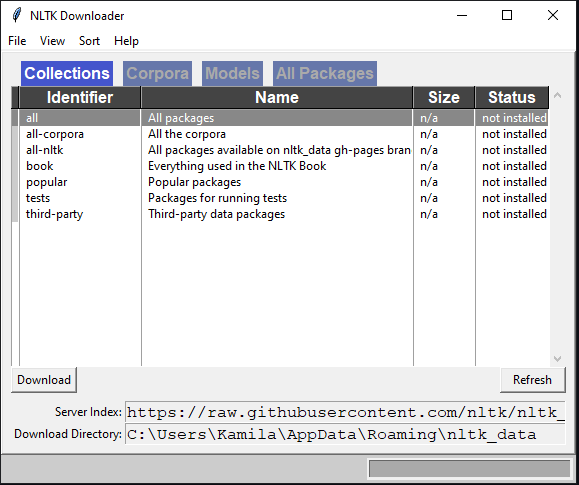

#### Tokenizacja

<p>Poprzez tokenizacje dzielimy tekst na słowa lub na zdania. Zdania są tokenami całego tekstu, a słowa tokenami zdań. 
Dzięki podziałowi tekstu na tokeny-słowa możemy sprawdzić częstotliwość ich występowania w całym tekście.<p>
<p>Tokenizacja zdań:</p>

In [1]:
import nltk
text = """At three o’clock precisely I was at Baker Street, but Holmes had not yet returned. The landlady informed me that he had left the house shortly after eight o’clock in the morning. I sat down beside the fire, however, with the intention of awaiting him, however long he might be. I was already deeply interested in his inquiry, for, though it was surrounded by none of the grim and strange features which were associated with the two crimes which I have already recorded, still, the nature of the case and the exalted station of his client gave it a character of its own."""
tokenized_sentences=nltk.tokenize.sent_tokenize(text)
print(tokenized_sentences)

['At three o’clock precisely I was at Baker Street, but Holmes had not yet returned.', 'The landlady informed me that he had left the house shortly after eight o’clock in the morning.', 'I sat down beside the fire, however, with the intention of awaiting him, however long he might be.', 'I was already deeply interested in his inquiry, for, though it was surrounded by none of the grim and strange features which were associated with the two crimes which I have already recorded, still, the nature of the case and the exalted station of his client gave it a character of its own.']


<p>Jak widać tokeny w formie zdań zostały wydzielone od kropki do kropki z pominięciem spacji.</p>
<p>Tokenizacja słów:</p>

In [2]:
text = """It’s quite too funny. I am sure you could never guess how I employed my morning, or what I ended by doing."""
tokenized_words = nltk.tokenize.word_tokenize(text)
print(tokenized_words)

['It', '’', 's', 'quite', 'too', 'funny', '.', 'I', 'am', 'sure', 'you', 'could', 'never', 'guess', 'how', 'I', 'employed', 'my', 'morning', ',', 'or', 'what', 'I', 'ended', 'by', 'doing', '.']


<p>Jak możemy zauważyć NLTK wyróżnia w 'It's', 's' jako osobne słowo co jest ważne ponieważ bez takiego wyróżnienia podczas przetwarzaania moglibyśmy utracić jedno słowo. Wyróżnia także poszczególne znaki interpunkcyjne.</p>

```Tokenize``` umożliwia nam również tokenizacje według własnego wyrażenia regularnego.

In [3]:
tokenized_regex = nltk.tokenize.regexp_tokenize(text, r'[,\.\?!"]\s*', gaps=True)
print(tokenized_regex)

['It’s quite too funny', 'I am sure you could never guess how I employed my morning', 'or what I ended by doing']


Przy pomocy podanego wyrażenia regularnego tokenami zostały fragmenty z pomiędzy znaków interpunkcyjnych (, . ? !)

#### Stemming

Stemming polega na usuwaniu ze słów przedrostków i przyrostków, tak aby dojść do słowa źródłowego. Samo źródłowe słowo nie musi być poprawne.

NLTK zawiera wiele różnych rodzai stemmerów, tu dla przykładu zastosowania wykorzystany zostanie Porter stemmer. Procedura przeprowadzona będzie na wcześniej stworzonych tokenach.

In [4]:
stemmer = nltk.stem.PorterStemmer()
print('Przed stemmingiem:\n', tokenized_words)
print()
print('Po stemmingu:\n', [stemmer.stem(i) for i in tokenized_words])

Przed stemmingiem:
 ['It', '’', 's', 'quite', 'too', 'funny', '.', 'I', 'am', 'sure', 'you', 'could', 'never', 'guess', 'how', 'I', 'employed', 'my', 'morning', ',', 'or', 'what', 'I', 'ended', 'by', 'doing', '.']

Po stemmingu:
 ['it', '’', 's', 'quit', 'too', 'funni', '.', 'i', 'am', 'sure', 'you', 'could', 'never', 'guess', 'how', 'i', 'employ', 'my', 'morn', ',', 'or', 'what', 'i', 'end', 'by', 'do', '.']


Jak widać część słów pozbawiona została przedrostków i przyrostków, słowo 'employed' zostało zamienione poprawnie na 'employ', ale np. słowo 'morning' po stemmingu zostało zamienione na 'morn' które nie ma sensu.

#### Lematyzacja

Lemmatyzacja jest procesem bardzo podobnym do stemmingu, również polega na sprowadzeniu słowa do podstawowej postaci, tym razem z kolei do przeprowadzenia tego procesu wykorzystywany jest słownik wraz z regułami fleksyjnymi. Poniżej wykorzystanie lematyzacji i porównanie z stemmingiem.

In [5]:
lemmatizer = nltk.stem.wordnet.WordNetLemmatizer()
print('Przed stemmingiem/lammatyzacją:\n', tokenized_words)
print()
print('Po stemmingu:\n', [stemmer.stem(i) for i in tokenized_words])
print()
print('Po lemmatyzacji:\n', [lemmatizer.lemmatize(i, "v") for i in tokenized_words])

Przed stemmingiem/lammatyzacją:
 ['It', '’', 's', 'quite', 'too', 'funny', '.', 'I', 'am', 'sure', 'you', 'could', 'never', 'guess', 'how', 'I', 'employed', 'my', 'morning', ',', 'or', 'what', 'I', 'ended', 'by', 'doing', '.']

Po stemmingu:
 ['it', '’', 's', 'quit', 'too', 'funni', '.', 'i', 'am', 'sure', 'you', 'could', 'never', 'guess', 'how', 'i', 'employ', 'my', 'morn', ',', 'or', 'what', 'i', 'end', 'by', 'do', '.']

Po lemmatyzacji:
 ['It', '’', 's', 'quite', 'too', 'funny', '.', 'I', 'be', 'sure', 'you', 'could', 'never', 'guess', 'how', 'I', 'employ', 'my', 'morning', ',', 'or', 'what', 'I', 'end', 'by', 'do', '.']


W przeciwieństwie do stemmingu po lematyzacji wszystkie słowa zostały zamienione na odpowiednie bezosobowe i bezokolicznikowe formy.

#### Tagowanie

Tagowanie polega na nadawaniu słowom odpowiednich tagów na podstawie tego jaką częścią mowy są (rzeczownik, czasownik, przymiotnik itd), oczywiście w języku angielskim. Słowa tagowane są bazując na kontekście w jakim zostały użyte i ich definicji. Odpowiednie rozwinięcia tagów możemy sprawdzić za pomocą polecenia ```nltk.help.upenn_tagset()```

In [6]:
nltk.pos_tag(tokenized_words)

[('It', 'PRP'),
 ('’', 'VBZ'),
 ('s', 'JJ'),
 ('quite', 'RB'),
 ('too', 'RB'),
 ('funny', 'JJ'),
 ('.', '.'),
 ('I', 'PRP'),
 ('am', 'VBP'),
 ('sure', 'JJ'),
 ('you', 'PRP'),
 ('could', 'MD'),
 ('never', 'RB'),
 ('guess', 'VB'),
 ('how', 'WRB'),
 ('I', 'PRP'),
 ('employed', 'VBD'),
 ('my', 'PRP$'),
 ('morning', 'NN'),
 (',', ','),
 ('or', 'CC'),
 ('what', 'WP'),
 ('I', 'PRP'),
 ('ended', 'VBN'),
 ('by', 'IN'),
 ('doing', 'VBG'),
 ('.', '.')]

In [7]:
nltk.help.upenn_tagset()

$: dollar
    $ -$ --$ A$ C$ HK$ M$ NZ$ S$ U.S.$ US$
'': closing quotation mark
    ' ''
(: opening parenthesis
    ( [ {
): closing parenthesis
    ) ] }
,: comma
    ,
--: dash
    --
.: sentence terminator
    . ! ?
:: colon or ellipsis
    : ; ...
CC: conjunction, coordinating
    & 'n and both but either et for less minus neither nor or plus so
    therefore times v. versus vs. whether yet
CD: numeral, cardinal
    mid-1890 nine-thirty forty-two one-tenth ten million 0.5 one forty-
    seven 1987 twenty '79 zero two 78-degrees eighty-four IX '60s .025
    fifteen 271,124 dozen quintillion DM2,000 ...
DT: determiner
    all an another any both del each either every half la many much nary
    neither no some such that the them these this those
EX: existential there
    there
FW: foreign word
    gemeinschaft hund ich jeux habeas Haementeria Herr K'ang-si vous
    lutihaw alai je jour objets salutaris fille quibusdam pas trop Monte
    terram fiche oui corporis ...
IN: preposition or

#### Filtracja stop words

Stop words to słowa najczęściej pojawiające się w zdaniach, nie mają one większego wpływu na informację w nim przekazaną i zajmują miejsce. Usunięcie ich zmniejsza rozmiar danych, bez negatywnych konsekwencji.

In [8]:
print(nltk.corpus.stopwords.words('english'))

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [9]:
stop_words = nltk.corpus.stopwords.words('english')
filtered = []
for w in tokenized_words:
    if w not in stop_words:
        filtered.append(w)
print('Tokeny przed filtracją:\n', tokenized_words)
print()
print('Tokeny po filtracji:\n', filtered)

Tokeny przed filtracją:
 ['It', '’', 's', 'quite', 'too', 'funny', '.', 'I', 'am', 'sure', 'you', 'could', 'never', 'guess', 'how', 'I', 'employed', 'my', 'morning', ',', 'or', 'what', 'I', 'ended', 'by', 'doing', '.']

Tokeny po filtracji:
 ['It', '’', 'quite', 'funny', '.', 'I', 'sure', 'could', 'never', 'guess', 'I', 'employed', 'morning', ',', 'I', 'ended', '.']


#### Chunking

Chunking pozwala na łączenie słów w grupy wyrazów (ang. chunks). Są one wybierane na podstawie utworzonej za pomocą wyrażeń regularnych reguły, która zawiera poszukiwane przez nas części zdania.

**Przykład 1:**
W zdaniu ```It’s quite too funny. I am sure you could never guess how I employed my morning, or what I ended by doing.``` szukane są grupy słów w postaci ```zaimek czasownik przymiotnik```:

In [24]:
pattern = r"""Chunk: {<PR.?>*<VB.?>*<JJ.?>*}"""
chunk_parser = nltk.RegexpParser(pattern)
chunked = chunk_parser.parse(nltk.pos_tag(tokenized_words))
print(text)
print(chunked)
chunked.draw()
print()

It’s quite too funny. I am sure you could never guess how I employed my morning, or what I ended by doing.
(S
  (Chunk It/PRP ’/VBZ s/JJ)
  quite/RB
  too/RB
  (Chunk funny/JJ)
  ./.
  (Chunk I/PRP am/VBP sure/JJ)
  (Chunk you/PRP)
  could/MD
  never/RB
  (Chunk guess/VB)
  how/WRB
  (Chunk I/PRP employed/VBD)
  my/PRP$
  morning/NN
  ,/,
  or/CC
  what/WP
  (Chunk I/PRP ended/VBN)
  by/IN
  (Chunk doing/VBG)
  ./.)



**Przykład 2:** W zdaniu `The quick brown fox jumps over the lazy dog.` szukane są grupy słów w postaci `określnik przymiotnik rzeczownik`:

In [25]:
text2 = 'The quick brown fox jumps over the lazy dog.'
tokenized_words2 = nltk.tokenize.word_tokenize(text2)

pattern2 = r"""Chunk: {<DT.?>*<JJ.?>*<NN.?>*}"""
chunk_parser2 = nltk.RegexpParser(pattern2)
chunked2 = chunk_parser2.parse(nltk.pos_tag(tokenized_words2))
print(text2)
print(chunked2)
chunked2.draw()

The quick brown fox jumps over the lazy dog.
(S
  (Chunk The/DT quick/JJ brown/NN fox/NN)
  jumps/VBZ
  over/IN
  (Chunk the/DT lazy/JJ dog/NN)
  ./.)


#### Częstotliwości

FreqDist() z biblioteki NLTK służy do zliczania liczby wystąpień każdego słowa w podanym tekście. Otrzymane wyniki przedstawić można za pomocą prostego wykresu.

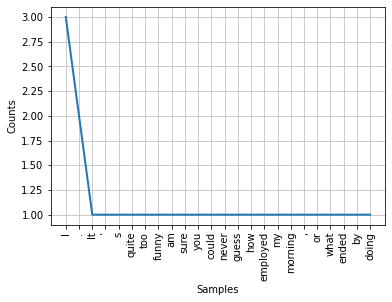

<AxesSubplot:xlabel='Samples', ylabel='Counts'>

In [12]:
fd = nltk.FreqDist(tokenized_words)
fd.plot()

Dodatkowo, jeśli podany argument nie będzie listą słów, a całym tekstem, podliczanana będzie liczba występowań poszczególnych znaków (a nie całych wyrazów).

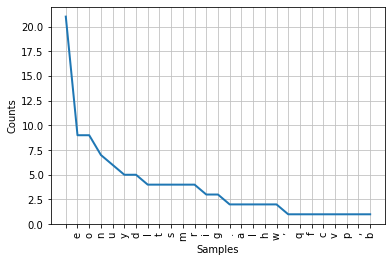

<AxesSubplot:xlabel='Samples', ylabel='Counts'>

In [13]:
fd = nltk.FreqDist(text)
fd.plot()

Przydatne linki: https://www.nltk.org/book/, http://namiekko.pl/2017/04/10/nlp-w-pigulce/#Ujednolicenie_form_wyrazow_lematyzacja_lub_stemming

#### Kolokacje

Kolokacje (ang. Collocations) polegają na łączeniu wyrazów w grupy. 

Wyrazy (tokeny) mogą być połączone w pary:

In [14]:
output = list(nltk.bigrams(tokenized_words2))
print(output)

[('The', 'quick'), ('quick', 'brown'), ('brown', 'fox'), ('fox', 'jumps'), ('jumps', 'over'), ('over', 'the'), ('the', 'lazy'), ('lazy', 'dog'), ('dog', '.')]


lub w trójki:

In [15]:
output2 = list(nltk.trigrams(tokenized_words2))
print(output2)

[('The', 'quick', 'brown'), ('quick', 'brown', 'fox'), ('brown', 'fox', 'jumps'), ('fox', 'jumps', 'over'), ('jumps', 'over', 'the'), ('over', 'the', 'lazy'), ('the', 'lazy', 'dog'), ('lazy', 'dog', '.')]


#### Analiza morfologiczna tekstu

NLTK pozwala na analize morfologiczną tekstu, polega ona na wyszukiwaniu encji w tekście i przypisywanie im odpowiedniego rodzaju. Dzięki temu można wyróżnić encje takie jak:
- Nazwa organizacji
- Osoba
- Lokalizacja
- Data
- Czas
- Pieniądze
- Procenty
- Obiekty
- Geograficzne określenia

In [22]:
obama_text = "Michelle LaVaughn Robinson Obama is an American attorney and author who served as the first lady of the United States from 2009 to 2017. Raised on the South Side of Chicago, Illinois, Obama is a graduate of Princeton University and Harvard Law School."
obama_tokenized = nltk.word_tokenize(obama_text)

In [17]:
obama_taged = nltk.pos_tag(obama_tokenized)
obama_taged

[('Michelle', 'NNP'),
 ('LaVaughn', 'NNP'),
 ('Robinson', 'NNP'),
 ('Obama', 'NNP'),
 ('is', 'VBZ'),
 ('an', 'DT'),
 ('American', 'JJ'),
 ('attorney', 'NN'),
 ('and', 'CC'),
 ('author', 'NN'),
 ('who', 'WP'),
 ('served', 'VBD'),
 ('as', 'IN'),
 ('the', 'DT'),
 ('first', 'JJ'),
 ('lady', 'NN'),
 ('of', 'IN'),
 ('the', 'DT'),
 ('United', 'NNP'),
 ('States', 'NNPS'),
 ('from', 'IN'),
 ('2009', 'CD'),
 ('to', 'TO'),
 ('2017', 'CD'),
 ('.', '.'),
 ('Raised', 'VBN'),
 ('on', 'IN'),
 ('the', 'DT'),
 ('South', 'NNP'),
 ('Side', 'NNP'),
 ('of', 'IN'),
 ('Chicago', 'NNP'),
 (',', ','),
 ('Illinois', 'NNP'),
 (',', ','),
 ('Obama', 'NNP'),
 ('is', 'VBZ'),
 ('a', 'DT'),
 ('graduate', 'NN'),
 ('of', 'IN'),
 ('Princeton', 'NNP'),
 ('University', 'NNP'),
 ('and', 'CC'),
 ('Harvard', 'NNP'),
 ('Law', 'NNP'),
 ('School', 'NNP'),
 ('.', '.')]

In [26]:
tree = nltk.ne_chunk(obama_taged)
tree.draw()

### Konkordancja

Konkordacja w NLTK pokazuje nam każde wystąpienie danego słowa wraz z kontekstem.

In [19]:
from nltk.book import *

*** Introductory Examples for the NLTK Book ***
Loading text1, ..., text9 and sent1, ..., sent9
Type the name of the text or sentence to view it.
Type: 'texts()' or 'sents()' to list the materials.
text1: Moby Dick by Herman Melville 1851
text2: Sense and Sensibility by Jane Austen 1811
text3: The Book of Genesis
text4: Inaugural Address Corpus
text5: Chat Corpus
text6: Monty Python and the Holy Grail
text7: Wall Street Journal
text8: Personals Corpus
text9: The Man Who Was Thursday by G . K . Chesterton 1908


In [20]:
text6.concordance("Grail")

Displaying 25 of 39 matches:
els sing ] Arthur , this is the Holy Grail . Look well , Arthur , for it is you
 it is your sacred task to seek this grail . That is your purpose , Arthur ... 
 , Arthur ... the quest for the Holy Grail . [ boom ] [ singing stops ] LAUNCEL
an join us in our quest for the Holy Grail . FRENCH GUARD : Well , I ' ll ask h
ARTHUR : If you will not show us the Grail , we shall take your castle by force
s required if the quest for the Holy Grail were to be brought to a successful c
should separate , and search for the Grail individually . [ clop clop clop ] No
AD : You are the keepers of the Holy Grail ? ZOOT : The what ? GALAHAD : The Gr
il ? ZOOT : The what ? GALAHAD : The Grail . It is here . ZOOT : Oh , but you a
ease ! In God ' s name , show me the Grail ! ZOOT : Oh , you have suffered much
rment me no longer . I have seen the Grail ! PIGLET : There ' s no grail here .
en the Grail ! PIGLET : There ' s no grail here . GALAHAD : I have seen it ! I 
are you goi

### Wykresy częstości

Dla zadanego tekstu możemy stworzyć wykres ukazujący ile razy dane słowo się pojawia i w którym momencie tekstu.

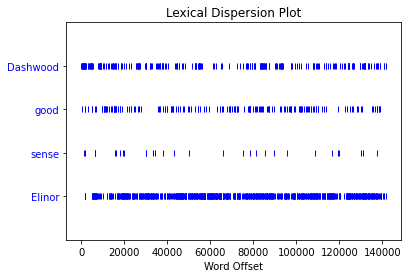

In [21]:
text2.dispersion_plot(['Dashwood', 'good', 'sense', 'Elinor'])